# K-Means Clustering

### Introduction

This workbook is designed to test the solution using a random selection of cluster centers. Let's see how it works out

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from Algorithm import Kmeans, scaler, get_2D_graph

### Read csv file

In [2]:
df = pd.read_csv(r'C:\Users\mpiernicki\PycharmProjects\K_Means_Algorithm\DATA\Iris.csv')

### Initial data clean

In [3]:
df.drop(['Id','Species'], axis=1, inplace=True)

### Check the basic information of the DataFrame

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


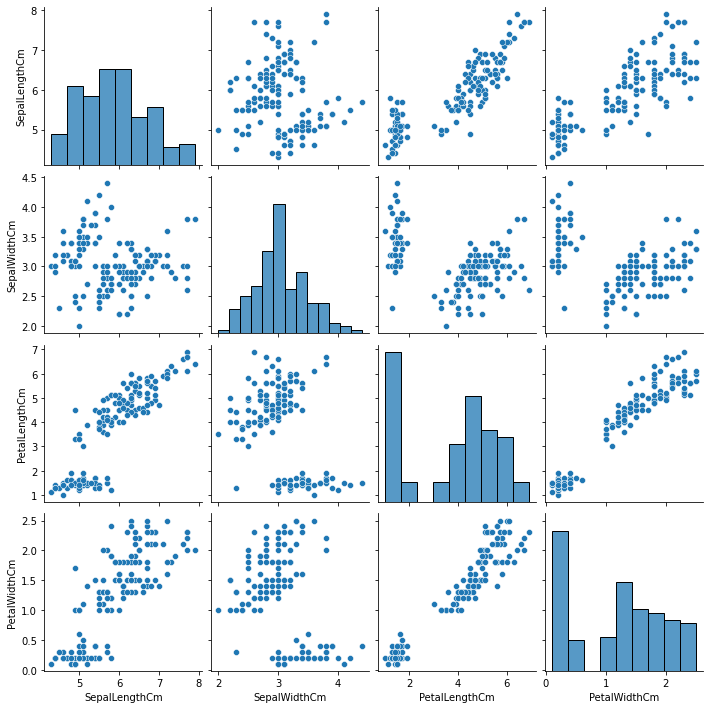

In [7]:
sns.pairplot(data=df)

### Scaling the data to improve clustering accuracy

In [8]:
df = scaler(df)

### Initialization of a class instance
#### "df" as dataframe to cluster, and "3" as number of clusters

In [9]:
kmeans = Kmeans(df,3)

### Selection of initial cluster using random method

In [10]:
init_centers = kmeans.get_init_centers()

### Assigning points to centers using K-Means

In [11]:
labels, centers = kmeans.get_final_centers(init_centers)

### Point labels

In [12]:
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


### Final centers

In [13]:
print(centers)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
116       0.997248      0.844522       1.015934      1.083322
85        0.963333      0.910508       0.777215      0.662388
66        0.782597      0.860807       0.274964     -0.010979


### Re-load the daframe to confirm correct of calculation

In [14]:
df_check = pd.read_csv(r'C:\Users\mpiernicki\PycharmProjects\K_Means_Algorithm\DATA\Iris.csv')

In [15]:
df_check.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Graph with the original dataframe with original labels

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

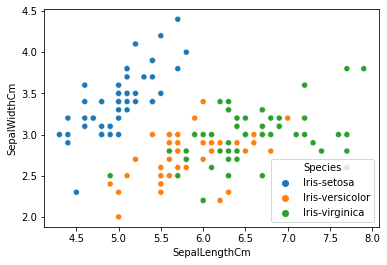

In [16]:
sns.scatterplot(data=df_check,x= 'SepalLengthCm',y= 'SepalWidthCm', hue='Species')

### Graph with the scaled dataframe with calculated labels

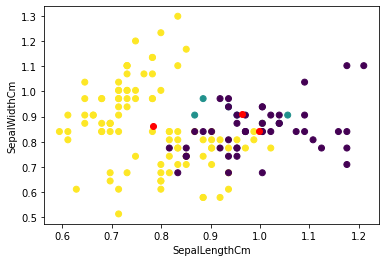

In [17]:
get_2D_graph(df, centers,labels,x_name='SepalLengthCm',y_name='SepalWidthCm')